# Aula 04 - Arvores de decisão e Randon Forest

## Objetivos Aula de hoje

* Arvore de decisão

* Entropia

* Visualização dos dados

* IRIS

* Train test split

* Randon Forest

* Atividade 1

In [1]:
import os, sys
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Árvores de decisão

In [73]:
n = 40
x = 2*np.random.rand(n) - 1
y = 2*np.random.rand(n) - 1
z = np.zeros([n])

In [74]:
for i in range(n):
    if x[i] > -0.5 and x[i] < 0.5 and y[i] > -0.5 and y[i] < 0.5:
        z[i] = 1      

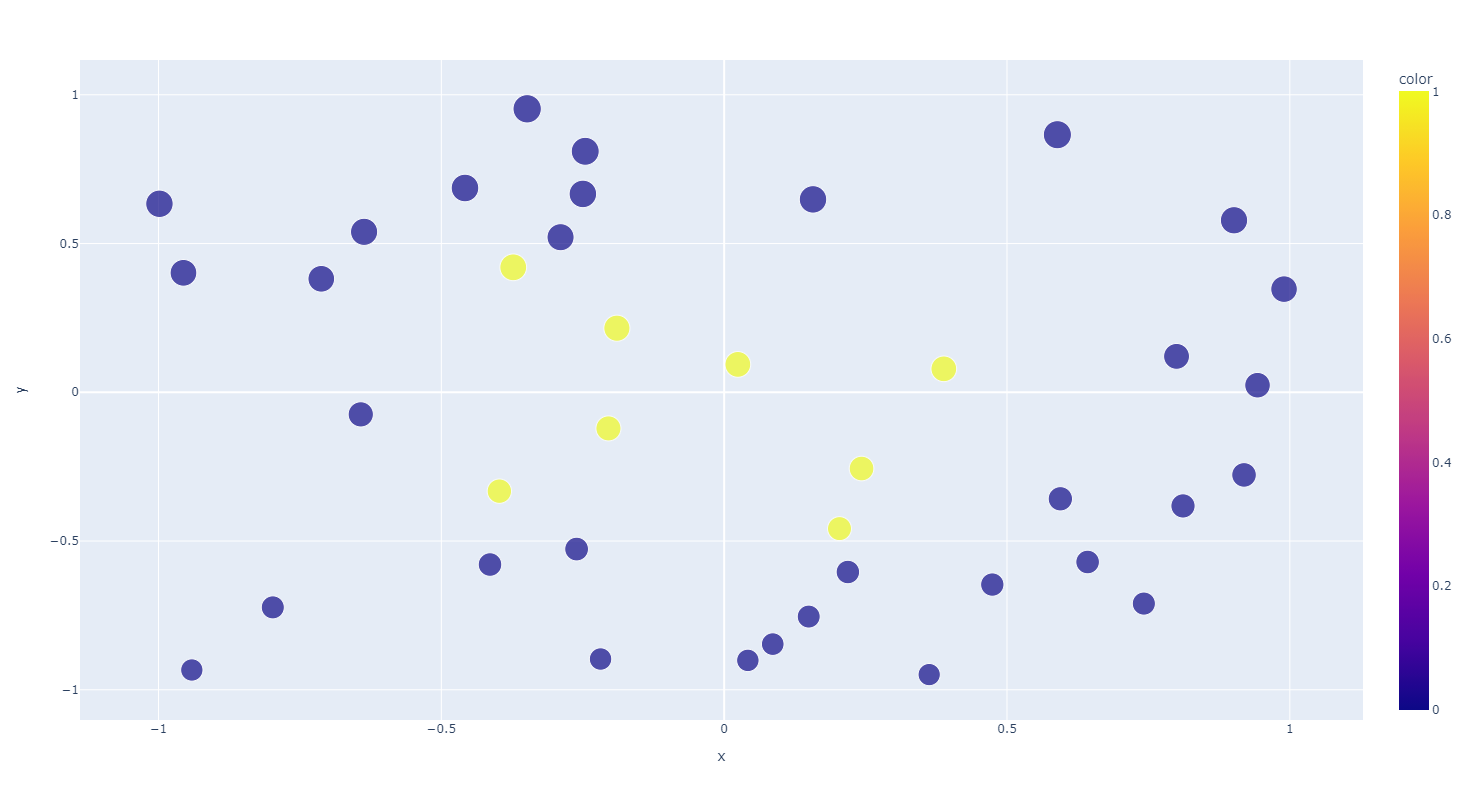

In [75]:
px.scatter(x=x, y=y, color=z, height=800, size=y+4)

In [76]:
8/40

0.2

In [77]:
0.2*np.log2(0.2)

-0.46438561897747244

In [78]:
0.8*np.log2(0.8)

-0.2575424759098898

In [79]:
0.8*np.log2(0.8) + 0.2*np.log2(0.2)

-0.7219280948873623

In [80]:
12/13

0.9230769230769231

In [81]:
1/13

0.07692307692307693

In [82]:
(1/13)*np.log2(1/13)

-0.28464920908777636

In [83]:
(12/13)*np.log2(12/13)

-0.1065943545414793

In [84]:
(12/13)*np.log2(12/13) + (1/13)*np.log2(1/13)

-0.39124356362925566

In [85]:
(7/27)*np.log2(7/27) + (20/27)*np.log2(20/27)

-0.8256265261578954

![Boltzman](https://www.researchgate.net/profile/Bahman-Zohuri/publication/327234817/figure/fig8/AS:726270384025602@1550167761738/Ludwig-Boltzmanns-grave-in-the-Zentralfriedhof-Vienna-Austria-bearing-the-entropy_Q640.jpg)

$$ \Large E = \sum{-p_i \cdot log(p)i)} $$

...


$$ \Large IG = E(parent) - \sum{w_i \cdot E(node)}  $$

## Iris dataset Visualization

In [87]:
iris = load_iris()

In [88]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [90]:
iris.data.shape

(150, 4)

In [97]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [94]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [107]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']
df = df.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_length",
                        "petal length (cm)": "petal_length", "petal width (cm)": "petal_width"})

In [111]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


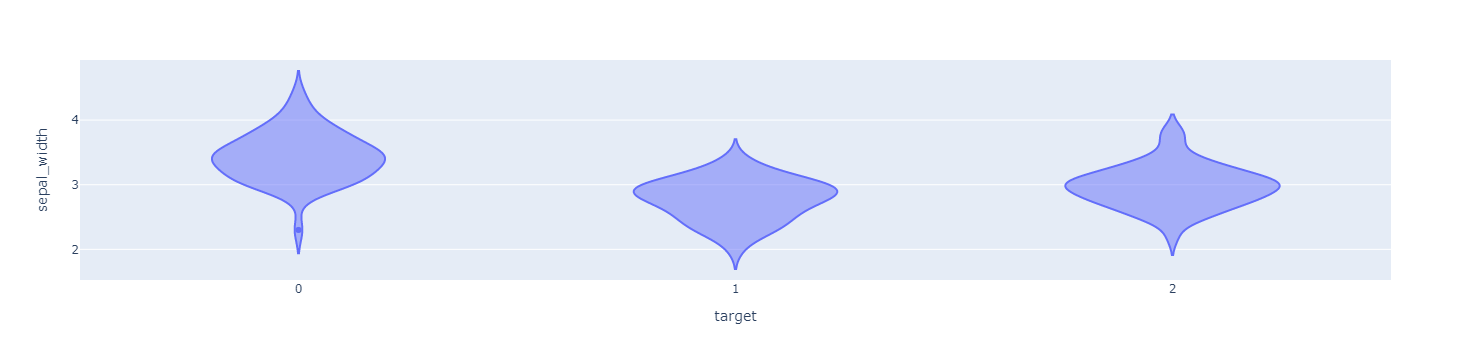

In [122]:
px.violin(df, x="target", y="sepal_width", width=600)

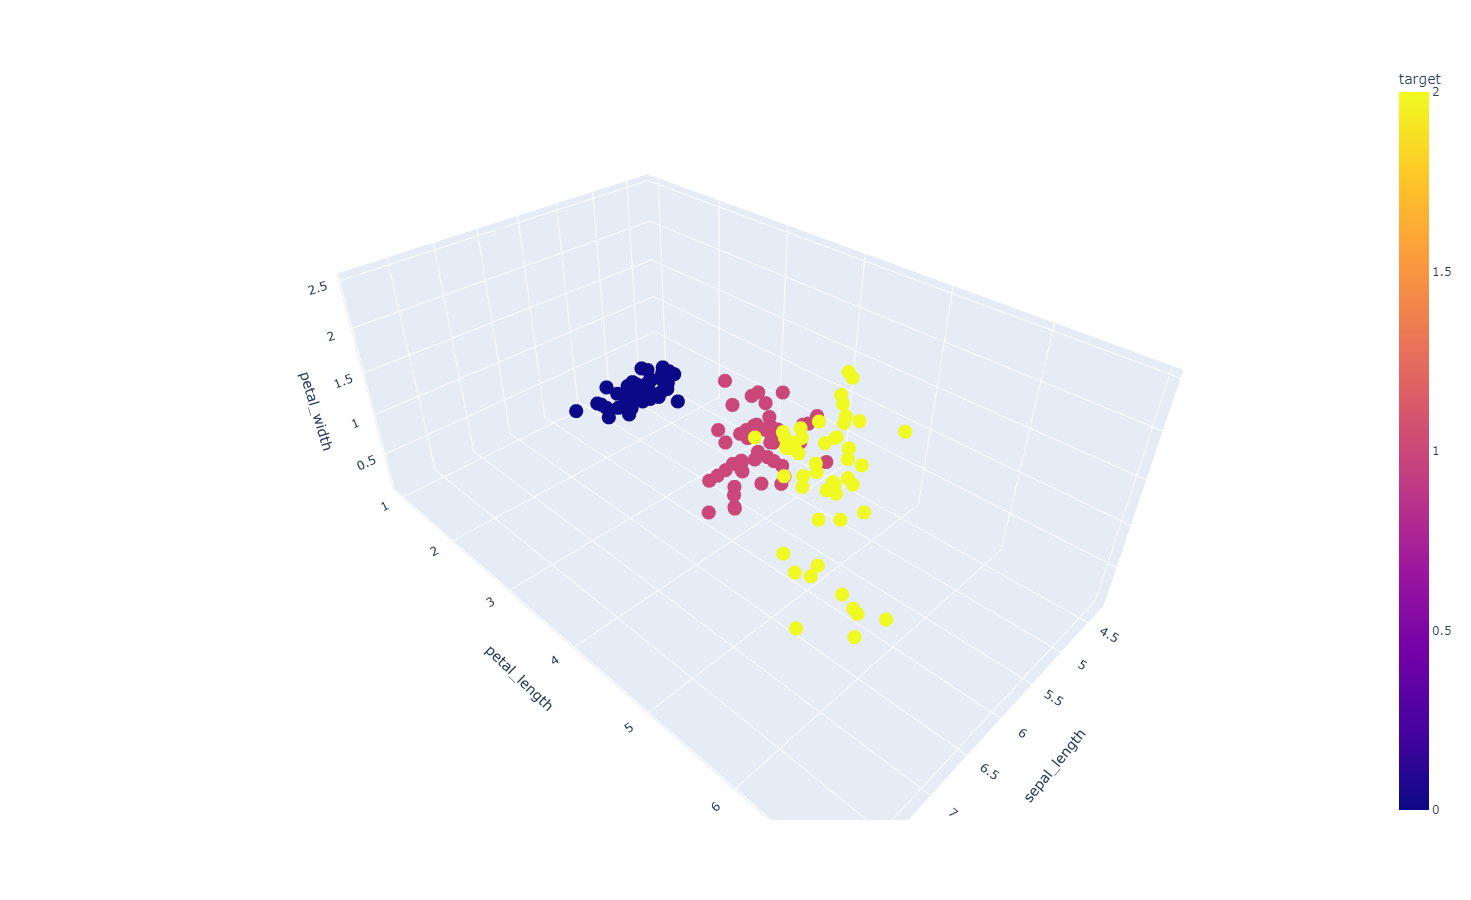

In [167]:
px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width',
              color='target', height=900)

In [119]:
cor = df.corr().round(2)

In [120]:
print(cor)

              sepal_length  sepal_width  petal_length  petal_width  target
sepal_length          1.00        -0.12          0.87         0.82    0.78
sepal_width          -0.12         1.00         -0.43        -0.37   -0.43
petal_length          0.87        -0.43          1.00         0.96    0.95
petal_width           0.82        -0.37          0.96         1.00    0.96
target                0.78        -0.43          0.95         0.96    1.00


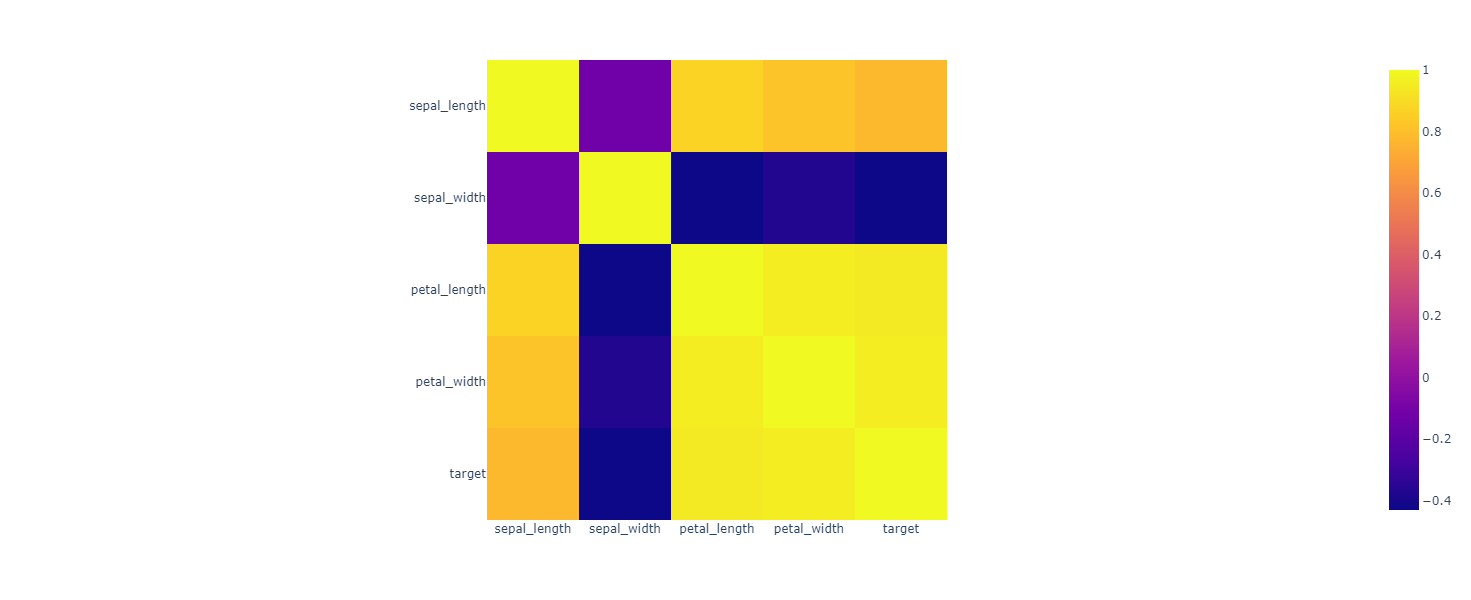

In [123]:
px.imshow(cor, height=600)

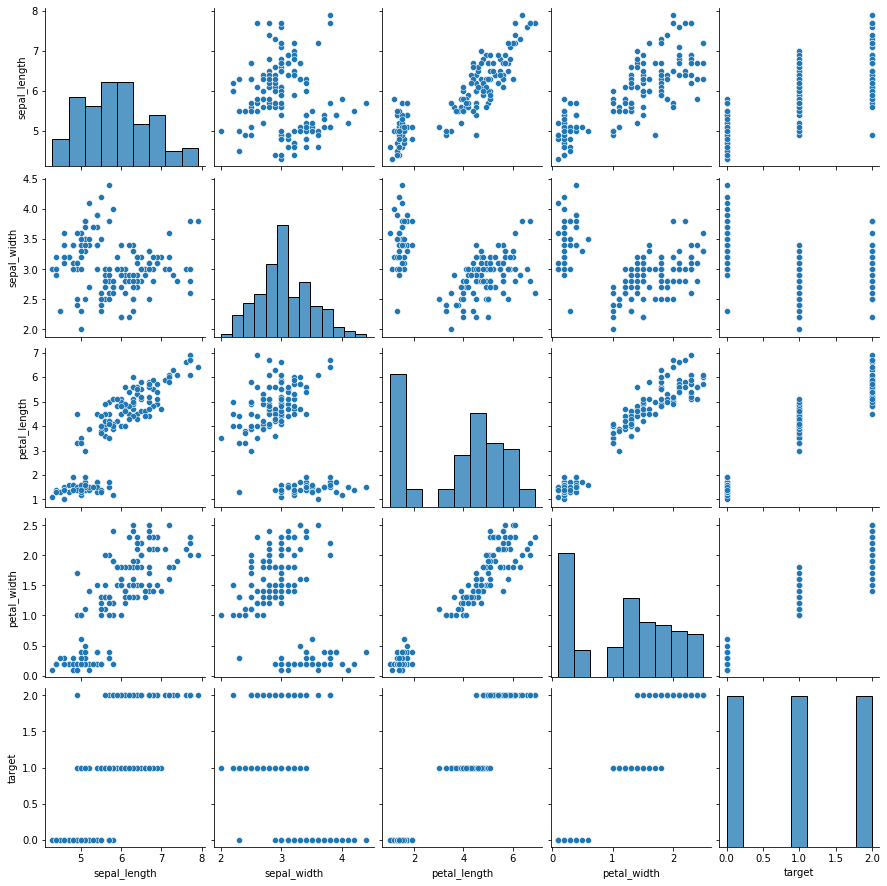

In [124]:
sns.pairplot(df)

## Arvore de decisão

In [127]:
classificador = DecisionTreeClassifier(random_state=42)

In [128]:
classificador.fit(iris.data, iris.target)

DecisionTreeClassifier(random_state=42)

In [129]:
iris_predict = classificador.predict(iris.data)

In [130]:
iris_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [131]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [132]:
metrics.accuracy_score(iris_predict, iris.target)

1.0

## Split data

In [133]:
iris.data.shape

(150, 4)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [136]:
X_train.shape

(105, 4)

In [137]:
X_test.shape

(45, 4)

In [138]:
y_train

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [162]:
classificador = DecisionTreeClassifier(random_state=42)
classificador.fit(X_train, y_train)
iris_predict = classificador.predict(X_test)
print(metrics.accuracy_score(iris_predict, y_test))

1.0


## Visualização Árvores de decisão

In [163]:
txt = tree.export_text(classificador)
print(txt)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.60
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.60
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



In [164]:
from dtreeviz.trees import dtreeviz

In [165]:
viz = dtreeviz(classificador, iris.data, iris.target,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

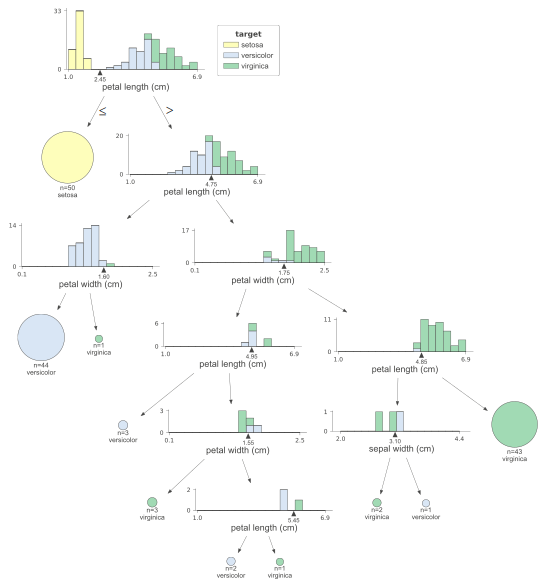

In [166]:
viz

## Randon Forest

* Boostrap

* menos features por arvore (também random)

* Agregação

In [169]:
classificador = RandomForestClassifier(n_estimators=200)
classificador.fit(X_train, y_train)
iris_predict = classificador.predict(X_test)
print(metrics.accuracy_score(iris_predict, y_test))

1.0
